# Uso de la Clase MeanRevBacktester
Ahora usaremos la clase Mean Reversion Backtester la cual permite realizar backtest con muchas estrategias y muchos instrumentos usando unas pocas líneas de código. El módulo MeanRevBacktester debe residir en la carpeta de trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8-whitegrid")

In [3]:
df = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2018-01-01 22:00:00+00:00,1.201205,1.351705,1.533390
2018-01-02 04:00:00+00:00,1.207055,1.354830,1.540480
2018-01-02 10:00:00+00:00,1.204440,1.357860,1.537980
2018-01-02 16:00:00+00:00,1.205800,1.359180,1.540185
2018-01-02 22:00:00+00:00,1.204690,1.359530,1.542225
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,1.311810,1.602420
2019-12-30 04:00:00+00:00,1.119940,1.311880,1.600800
2019-12-30 10:00:00+00:00,1.120095,1.311465,1.601165


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  2070 non-null   float64
 1   GBPUSD  2074 non-null   float64
 2   EURAUD  2071 non-null   float64
dtypes: float64(3)
memory usage: 64.8 KB


In [5]:
ptc = 0.00007

In [7]:
import MeanRevBacktester as MeanREv

In [16]:
tester = MeanREv.MeanRevBacktester("EURUSD", 30, 2, "2018-01-01", "2019-12-31", ptc)

In [17]:
tester

MeanRevBacktester(symbol = EURUSD, SMA = 30, dev = 2, start = 2018-01-01, end = 2019-12-31)

In [18]:
tester.test_strategy()

(np.float64(1.069792), np.float64(0.132076))

Habiendo creado una instancia (tester) de la clase MeanBacktester, realizamos el backtest de nuestros datos llamando al método test_strategy. El resultado corresponde al rendimiento absoluto de nuestra estrategia y la mejora del rendimiento, comparada con B/H.  
También podemos ver como ha sido modificado el dataframe como resultado de los cálculos:

In [19]:
tester.results

,price,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,0.0,1.008491,1.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,0.0,1.007060,1.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,0.0,1.008700,1.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,-0.000070,1.0,1.014865,0.999930
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,0.0,1.016781,0.998045
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.0,0.937352,1.070207
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.0,0.937369,1.070188
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.0,0.937498,1.070040


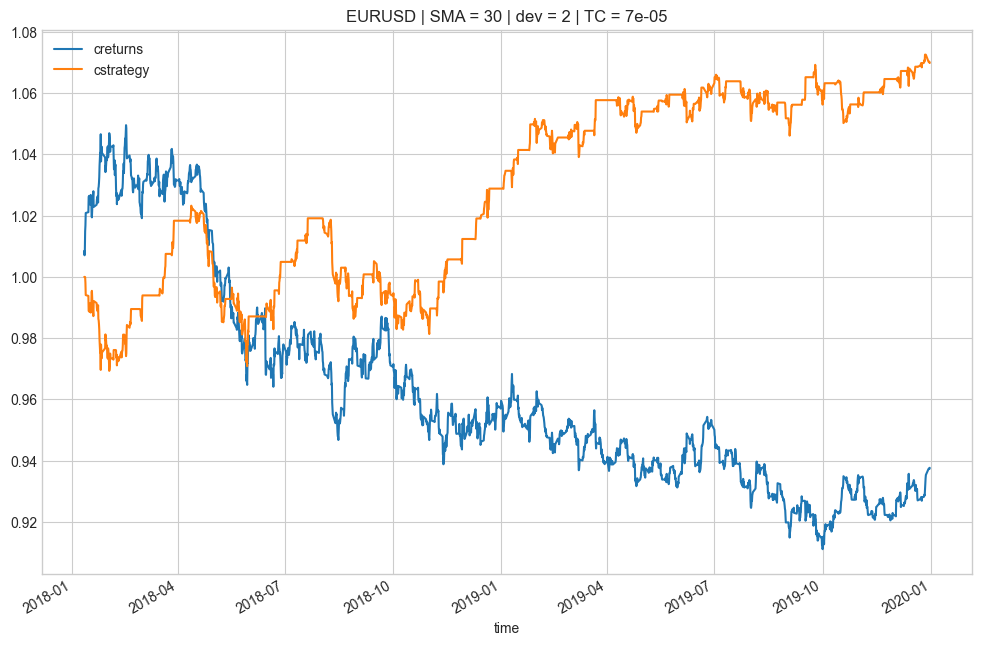

In [20]:
# ahora podemos graficar los resultados del backtest para análisis
tester.plot_results()

In [21]:
tester.optimize_parameters((25, 100, 1), (1, 5, 1))

(array([58.,  1.]), np.float64(1.238111))

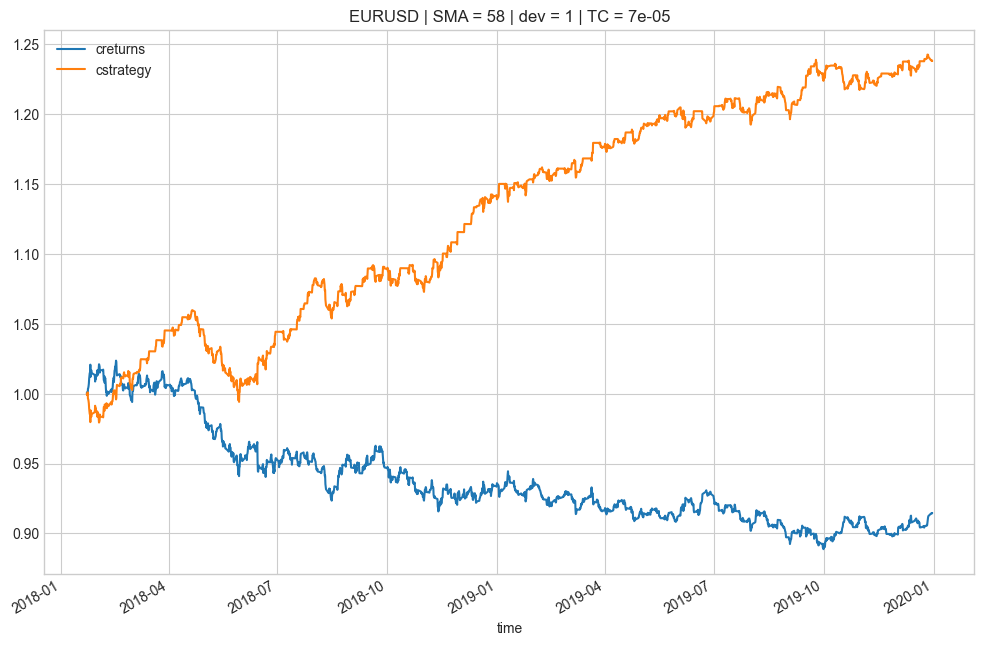

In [22]:
tester.plot_results()

<h3> Backtesting and Forward testing </h3>